# Training and running a linear model using scikit-learn

In [31]:
#importing all neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option('display.max_columns',None)

In [33]:
life_index=pd.read_csv(r'E:\ML Projects\oecd_bli_2015.csv',thousands=',')

In [34]:
gdp_percapita=pd.read_csv(r'E:\ML Projects\gdp_per_capita.csv',delimiter='\t',encoding='latin1',
                          thousands=',')

#Used delimiter='\t' for parser error(There was a tab space between the words),
#Used encoding='latin1' instead of utf8(which is by default)

## Data Analysis

In [35]:
gdp_percapita.shape
#We have 190 rows of gdps of all countries and 6 columns with 

(190, 7)

In [36]:
gdp_percapita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [40]:
if(np.all(gdp_percapita['Country'])):
    print('Each row is a meta data about each country')
else:
     print('Please go through the data again')   
#np.all() Test whether all array elements along a given axis evaluate to True.       

Each row is a meta data about each country


In [41]:
gdp_percapita.shape
#there are 189 countries from the data given

(190, 7)

In [42]:
gdp_percapita['Subject Descriptor'].value_counts()
#Found a null value in this feature

Gross domestic product per capita, current prices    189
Name: Subject Descriptor, dtype: int64

In [47]:
gdp_percapita[gdp_percapita['Subject Descriptor'].isnull()]
#The null value belongs to International Monetary Fund, which can be dropped

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
gdp_percapita=gdp_percapita.drop(gdp_percapita.index[-1])

In [48]:
gdp_percapita['Units'].unique()
#All the rows contain the same unit.So, dropping this column is the justified

array(['U.S. dollars', nan], dtype=object)

In [52]:
gdp_percapita=gdp_percapita.drop('Units',axis=1)

In [53]:
gdp_percapita['Scale'].unique()
#All the rows contain the same unit.So, dropping this column is the justified

array(['Units'], dtype=object)

In [55]:
gdp_percapita['Country/Series-specific Notes'].value_counts()
#All the rows contain the same value.So, dropping this column is the justified

See notes for:  Gross domestic product, current prices (National currency) Population (Persons).    188
Name: Country/Series-specific Notes, dtype: int64

In [57]:
gdp_percapita=gdp_percapita.drop('Country/Series-specific Notes',axis=1)

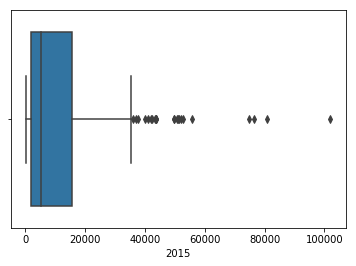

In [59]:
sns.boxplot(gdp_percapita['2015'])
#There are some outliers

In [60]:
gdp_percapita['2015'].describe()

count       187.000000
mean      12590.961401
std       17387.035890
min         220.860000
25%        1783.538000
50%        5373.633000
75%       15490.576500
max      101994.093000
Name: 2015, dtype: float64

In [61]:
life_index1=life_index[life_index['INEQUALITY']=='TOT']

In [62]:
life_index1.shape
#we have life satisfaction values for 3292 rows with 16 columns

(888, 17)

In [63]:
life_index1 = life_index1.pivot(index="Country", columns="Indicator", values="Value")

In [64]:
life_index1

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,21.0,5.0,80.5,6.9,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,21.0,6.4,81.5,7.3,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,18.0,4.4,78.9,6.7,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,26.0,4.1,78.2,6.5,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,24.0,5.6,80.1,7.5,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,19.0,5.2,76.5,5.6,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [65]:
life_index1.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [66]:
gdp_percapita['gdp']=gdp_percapita['2015']

In [68]:
#prepare the data
country_stats=pd.DataFrame(gdp_percapita,life_index)
x=np.c_[country_stats['gdp']]
y=np.c_[country_stats['Life satisfaction']]
#np.c_:Translates slice objects to concatenation along the second axis

KeyError: 'Life satisfaction'

In [ ]:
#plot a scatterplot


In [ ]:
countries_group=life_index.groupby('Country')

In [ ]:
countries_group.get_group('Austria')